<a href="https://colab.research.google.com/github/MaulanaJauhar/PCVK/blob/main/Week9/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modul 9 - Morfologi (Erosi, Dilasi, Opening, Closing, Transformasi Top-hat dan Bottom-hat, Skeleton, Thickening)


**Pengolahan Citra dan Visi Komputer – Jurusan Teknologi Informasi**

##Kelompok:
####- Aido Lutfhi AL Hakim | 2141720136
####- Jauhar Maulana A'la | 2141720186
####- Naufal Falah Wafiuddin | 2141720129
Link Github : https://github.com/NFalah25/PCVK

##1. Import drive

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##2. Import Library

In [77]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

##3. Fungsi Dilasi Tanpa Library OpenCV

CPU times: user 188 ms, sys: 554 µs, total: 189 ms
Wall time: 192 ms


(-0.5, 286.5, 109.5, -0.5)

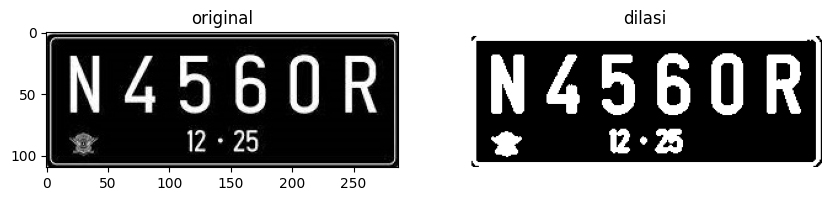

In [78]:
# Fungsi untuk melakukan dilasi dengan SE berbentuk cross 3x3

# Struktur elemen berbentuk cross 3x3
se = np.array([[0, 1, 0],
              [1, 1, 1],
              [0, 1, 0]], dtype=np.uint8)

# Load citra asli menggunakan OpenCV
citra_asli = cv2.imread('/content/drive/MyDrive/PCVK/images/plat.jpg', cv2.IMREAD_GRAYSCALE)

image_height, image_width = citra_asli.shape
se_height, se_width = se.shape
dilated_image = np.zeros((image_height, image_width), dtype=np.uint8)

def dilate_3x3cross():

    th, threshed = cv2.threshold(citra_asli, 40, 255, cv2.THRESH_BINARY)
    for y in range(image_height):
        for x in range(image_width):
            if threshed[y, x] == 255:  # Check if the pixel in the input image is white (255)
                for i in range(se_height):
                    for j in range(se_width):
                        if se[i, j] == 1:
                            # Calculate the coordinates in the input image
                            img_x = x + j - se_width // 2
                            img_y = y + i - se_height // 2

                            # Check boundaries
                            if 0 <= img_x < image_width and 0 <= img_y < image_height:
                                dilated_image[img_y, img_x] = 255

%time dilate_3x3cross()
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(citra_asli, cmap = 'gray')
ax[0].set_title('original')
plt.axis(False)
ax[1].imshow(dilated_image, cmap = 'gray')
ax[1].set_title('dilasi')
plt.axis(False)

##4. Dilasi dengan library OpenCV

Structuring Element (SE):
[[0 1 0]
 [1 1 1]
 [0 1 0]]


(-0.5, 286.5, 109.5, -0.5)

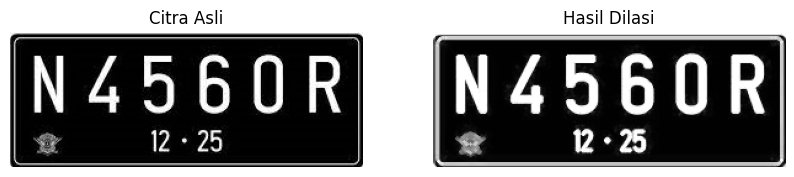

In [79]:
# Load citra asli menggunakan OpenCV
citra_asli = cv2.imread('/content/drive/MyDrive/PCVK/images/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk cross 3x3
se = np.array([[0, 1, 0],
               [1, 1, 1],
               [0, 1, 0]], dtype=np.uint8)

# Lakukan dilasi dengan SE
citra_hasil_dilasi = cv2.dilate(citra_asli, se, iterations=1)

# Cetak Structuring Element
print("Structuring Element (SE):")
print(se)
# Tampilkan citra asli dan hasil dilasi
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(citra_asli, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Hasil Dilasi")
plt.imshow(citra_hasil_dilasi, cmap='gray')
plt.axis('off')

##5. Fungsi Erosi Tanpa library OpenCV

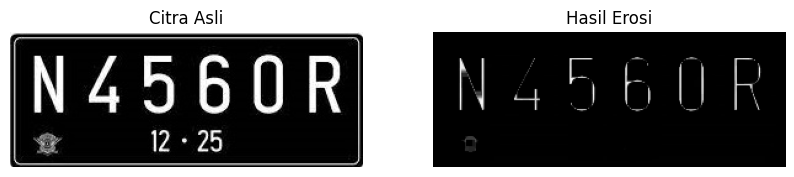

In [80]:
# Load citra asli menggunakan OpenCV
citra_asli = cv2.imread('/content/drive/MyDrive/PCVK/images/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk square 5x5
se = np.ones((5, 5), dtype=np.uint8)

# Lakukan erosi dengan SE
def erosi(citra_asli, se):
    height, width = citra_asli.shape
    citra_erosi = np.zeros((height, width), dtype=np.uint8)

    se_height, se_width = se.shape
    se_center_x, se_center_y = se_width // 2, se_height // 2

    for x in range(se_center_x, width - se_center_x):
        for y in range(se_center_y, height - se_center_y):
            # Inisialisasi nilai minimum
            min_pixel = 255

            for i in range(-se_center_x, se_center_x + 1):
                for j in range(-se_center_y, se_center_y + 1):
                    if se[j + se_center_y][i + se_center_x] == 1:
                        pixel_value = citra_asli[y + j][x + i]
                        min_pixel = min(min_pixel, pixel_value)

            citra_erosi[y][x] = min_pixel

    return citra_erosi

# Lakukan erosi pada citra asli
citra_hasil_erosi = erosi(citra_asli, se)

# Tampilkan citra asli dan hasil erosi
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(citra_asli, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Hasil Erosi")
plt.imshow(citra_hasil_erosi, cmap='gray')
plt.axis('off')
plt.show()

##6. Fungsi Erosi dengan library OpenCV

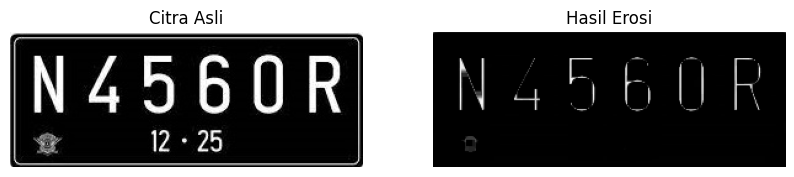

In [81]:
# Load citra asli menggunakan OpenCV
citra_asli = cv2.imread('/content/drive/MyDrive/PCVK/images/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk square 5x5
se = np.ones((5, 5), dtype=np.uint8)

# Lakukan erosi dengan SE menggunakan morphology dari OpenCV
citra_hasil_erosi = cv2.erode(citra_asli, se, iterations=1)

# Tampilkan citra asli dan hasil erosi
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(citra_asli, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Hasil Erosi")
plt.imshow(citra_hasil_erosi, cmap='gray')
plt.axis('off')

plt.show()


##7. Operasi Opening ***dengan*** dan ***tanpa*** library OpenCV

###Tanpa Library morphology dari OpenCV

(-0.5, 286.5, 109.5, -0.5)

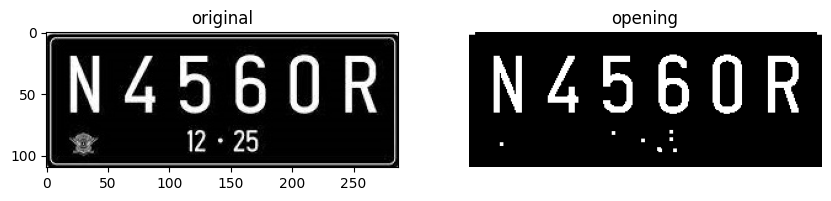

In [82]:
# Load citra asli menggunakan OpenCV
citra_asli = cv2.imread('/content/drive/MyDrive/PCVK/images/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk square 3x3
se = np.ones((3, 3), dtype=np.uint8)

# Get the dimensions of the image and structuring element
image_height, image_width = citra_asli.shape
se_height, se_width = se.shape

# Create an empty output image of the same size as the input image
opened_image = np.zeros((image_height, image_width), dtype=np.uint8)
threshed = cv2.threshold(citra_asli, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# Perform erosion manually using the square structuring element
for y in range(image_height):
    for x in range(image_width):
        is_inside = True
        for i in range(se_height):
            for j in range(se_width):
                img_x = x + j - se_width // 2
                img_y = y + i - se_height // 2
                if not (0 <= img_x < image_width and 0 <= img_y < image_height):
                    is_inside = False
                    break
                if threshed[img_y, img_x] != 255:
                    is_inside = False
                    break
            if not is_inside:
                break
        if is_inside:
            opened_image[y, x] = 255

# Define the structuring element for dilation (3x3 square)
se = np.ones((3, 3), dtype=np.uint8)

# Get the dimensions of the image and structuring element
se_height, se_width = se.shape

# Create an empty output image for dilation
dilated_image = np.zeros((image_height, image_width), dtype=np.uint8)

# Perform dilation manually using the square structuring element
for y in range(image_height):
    for x in range(image_width):
        if opened_image[y, x] == 255:  # Check if the pixel in the opened image is white (255)
            for i in range(se_height):
                for j in range(se_width):
                    img_x = x + j - se_width // 2
                    img_y = y + i - se_height // 2
                    if 0 <= img_x < image_width and 0 <= img_y < image_height:
                        dilated_image[img_y, img_x] = 255

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(citra_asli, cmap = 'gray')
ax[0].set_title('original')
plt.axis(False)

ax[1].imshow(dilated_image, cmap = 'gray')
ax[1].set_title('opening')
plt.axis(False)

###Dengan Library morphology dari OpenCV

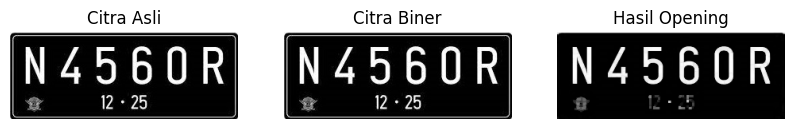

In [83]:
# Load citra asli menggunakan OpenCV
citra_asli = cv2.imread('/content/drive/MyDrive/PCVK/images/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk square 3x3
se = np.ones((3, 3), dtype=np.uint8)

# Lakukan erosi dengan SE menggunakan morphology dari OpenCV
citra_hasil_erosi = cv2.erode(citra_asli, se, iterations=1)

# Lakukan opening (erosi diikuti dilasi) dengan SE menggunakan morphology dari OpenCV
citra_opening = cv2.morphologyEx(citra_asli, cv2.MORPH_OPEN, se)

# Tampilkan citra asli, hasil erosi, dan hasil opening
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.title("Citra Asli")
plt.imshow(citra_asli, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Citra Biner")
plt.imshow(citra_asli, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Hasil Opening")
plt.imshow(citra_opening, cmap='gray')
plt.axis('off')

plt.show()


##8. Operasi Closing dengan dan tanpa library morphology dari OpenCV

(-0.5, 286.5, 109.5, -0.5)

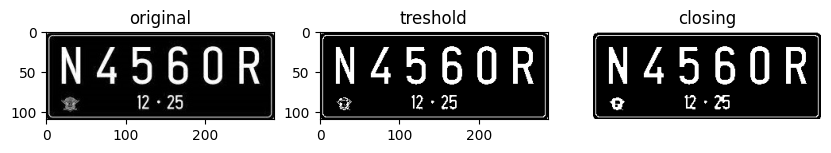

In [84]:
binr = cv2.threshold(citra_asli, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((3, 3), np.uint8)

# opening the image
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)

# print the output
fig, ax = plt.subplots(1, 3, figsize=(10,5))
ax[0].imshow(citra_asli, cmap = 'gray')
ax[0].set_title('original')
plt.axis(False)
ax[1].imshow(binr, cmap = 'gray')
ax[1].set_title('treshold')
plt.axis(False)
ax[2].imshow(closing, cmap = 'gray')
ax[2].set_title('closing')
plt.axis(False)

##9. Operasi dilasi berbentuk cross 3 x 3 dan 5 x 5

###Cross 3

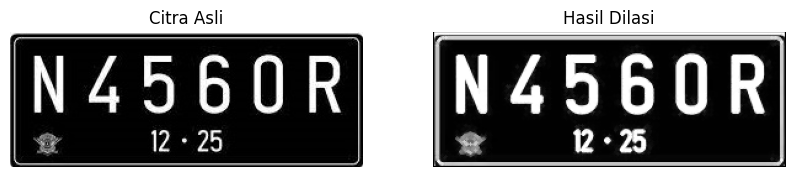

In [85]:
# Fungsi untuk melakukan dilasi dengan SE berbentuk cross 3x3
def dilasi(citra_asli):
    height, width = citra_asli.shape
    citra_dilasi = np.zeros((height, width), dtype=np.uint8)

    # Struktur elemen berbentuk cross 3x3
    se = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

    se_width, se_height = se.shape
    se_center_x, se_center_y = se_width // 2, se_height // 2

    for x in range(se_center_x, width - se_center_x):
        for y in range(se_center_y, height - se_center_y):
            # Inisialisasi nilai maksimum
            max_pixel = 0

            for i in range(-se_center_x, se_center_x + 1):
                for j in range(-se_center_y, se_center_y + 1):
                    if se[i + se_center_x][j + se_center_y] == 1:
                        pixel_value = citra_asli[y + j][x + i]
                        max_pixel = max(max_pixel, pixel_value)

            citra_dilasi[y][x] = max_pixel

    return citra_dilasi

# Load citra asli menggunakan OpenCV
citra_asli = cv2.imread('/content/drive/MyDrive/PCVK/images/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Lakukan dilasi
citra_hasil_dilasi = dilasi(citra_asli)

# Tampilkan citra asli dan hasil dilasi
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(citra_asli, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Hasil Dilasi")
plt.imshow(citra_hasil_dilasi, cmap='gray')
plt.axis('off')

plt.show()

###Cross 5

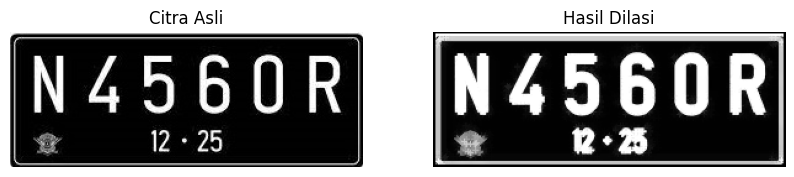

In [86]:
# Fungsi untuk melakukan dilasi dengan SE berbentuk cross 3x3
def dilasi(citra_asli):
    height, width = citra_asli.shape
    citra_dilasi = np.zeros((height, width), dtype=np.uint8)

    # Struktur elemen berbentuk cross 3x3
    se = np.array([[0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [1, 1, 1, 1, 1],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0]
                   ], dtype=np.uint8)

    se_width, se_height = se.shape
    se_center_x, se_center_y = se_width // 2, se_height // 2

    for x in range(se_center_x, width - se_center_x):
        for y in range(se_center_y, height - se_center_y):
            # Inisialisasi nilai maksimum
            max_pixel = 0

            for i in range(-se_center_x, se_center_x + 1):
                for j in range(-se_center_y, se_center_y + 1):
                    if se[i + se_center_x][j + se_center_y] == 1:
                        pixel_value = citra_asli[y + j][x + i]
                        max_pixel = max(max_pixel, pixel_value)

            citra_dilasi[y][x] = max_pixel

    return citra_dilasi

# Load citra asli menggunakan OpenCV
citra_asli = cv2.imread('/content/drive/MyDrive/PCVK/images/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Lakukan dilasi
citra_hasil_dilasi = dilasi(citra_asli)

# Tampilkan citra asli dan hasil dilasi
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(citra_asli, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Hasil Dilasi")
plt.imshow(citra_hasil_dilasi, cmap='gray')
plt.axis('off')

plt.show()

##10. Operasi dilasi berbentuk cross 3 x 3 dan 5 x 5

###Cross 3

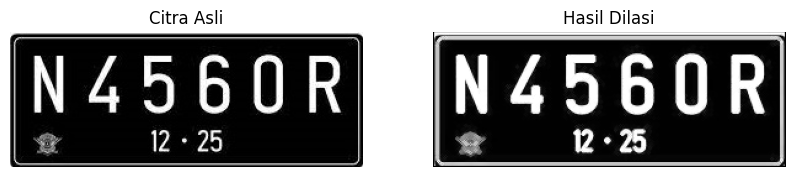

In [87]:
# Fungsi untuk melakukan dilasi dengan SE berbentuk cross 3x3
def dilasi(citra_asli):
    height, width = citra_asli.shape
    citra_dilasi = np.zeros((height, width), dtype=np.uint8)

    # Struktur elemen berbentuk cross 3x3
    se = np.array([[0, 1, 0],
                   [1, 0, 1],
                   [0, 1, 0]], dtype=np.uint8)

    se_width, se_height = se.shape
    se_center_x, se_center_y = se_width // 2, se_height // 2

    for x in range(se_center_x, width - se_center_x):
        for y in range(se_center_y, height - se_center_y):
            # Inisialisasi nilai maksimum
            max_pixel = 0

            for i in range(-se_center_x, se_center_x + 1):
                for j in range(-se_center_y, se_center_y + 1):
                    if se[i + se_center_x][j + se_center_y] == 1:
                        pixel_value = citra_asli[y + j][x + i]
                        max_pixel = max(max_pixel, pixel_value)

            citra_dilasi[y][x] = max_pixel

    return citra_dilasi

# Load citra asli menggunakan OpenCV
citra_asli = cv2.imread('/content/drive/MyDrive/PCVK/images/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Lakukan dilasi
citra_hasil_dilasi = dilasi(citra_asli)

# Tampilkan citra asli dan hasil dilasi
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(citra_asli, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Hasil Dilasi")
plt.imshow(citra_hasil_dilasi, cmap='gray')
plt.axis('off')

plt.show()

###Cross 5

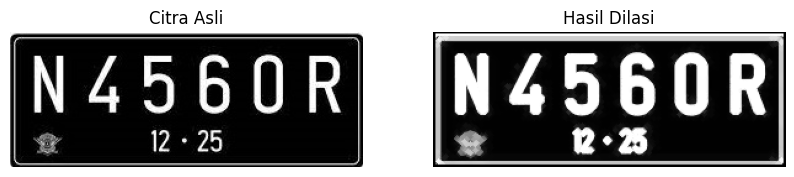

In [88]:
# Fungsi untuk melakukan dilasi dengan SE berbentuk cross 3x3
def dilasi(citra_asli):
    height, width = citra_asli.shape
    citra_dilasi = np.zeros((height, width), dtype=np.uint8)

    # Struktur elemen berbentuk cross 3x3
    se = np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0],
                   [1, 1, 1, 1, 1],
                   [0, 1, 1, 1, 0],
                   [0, 0, 1, 0, 0]
                   ], dtype=np.uint8)

    se_width, se_height = se.shape
    se_center_x, se_center_y = se_width // 2, se_height // 2

    for x in range(se_center_x, width - se_center_x):
        for y in range(se_center_y, height - se_center_y):
            # Inisialisasi nilai maksimum
            max_pixel = 0

            for i in range(-se_center_x, se_center_x + 1):
                for j in range(-se_center_y, se_center_y + 1):
                    if se[i + se_center_x][j + se_center_y] == 1:
                        pixel_value = citra_asli[y + j][x + i]
                        max_pixel = max(max_pixel, pixel_value)

            citra_dilasi[y][x] = max_pixel

    return citra_dilasi

# Load citra asli menggunakan OpenCV
citra_asli = cv2.imread('/content/drive/MyDrive/PCVK/images/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Lakukan dilasi
citra_hasil_dilasi = dilasi(citra_asli)

# Tampilkan citra asli dan hasil dilasi
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(citra_asli, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Hasil Dilasi")
plt.imshow(citra_hasil_dilasi, cmap='gray')
plt.axis('off')

plt.show()

##11. Operasi Erosi

###Rectangle 3 x 5

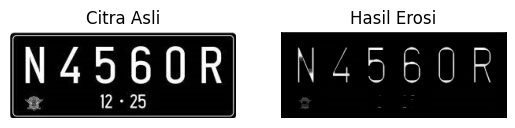

In [89]:
# Load citra asli menggunakan OpenCV
citra_asli = cv2.imread('/content/drive/MyDrive/PCVK/images/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk square 5x5
se = np.array([[1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1]
               ], dtype=np.uint8)


# Lakukan erosi dengan SE
def erosi(citra_asli, se):
    height, width = citra_asli.shape
    citra_erosi = np.zeros((height, width), dtype=np.uint8)

    se_height, se_width = se.shape
    se_center_x, se_center_y = se_width // 2, se_height // 2

    for x in range(se_center_x, width - se_center_x):
        for y in range(se_center_y, height - se_center_y):
            # Inisialisasi nilai minimum
            min_pixel = 255

            for i in range(-se_center_x, se_center_x + 1):
                for j in range(-se_center_y, se_center_y + 1):
                    if se[j + se_center_y][i + se_center_x] == 1:
                        pixel_value = citra_asli[y + j][x + i]
                        min_pixel = min(min_pixel, pixel_value)

            citra_erosi[y][x] = min_pixel

    return citra_erosi

# Lakukan erosi pada citra asli
citra_hasil_erosi = erosi(citra_asli, se)

# Tampilkan citra asli dan hasil erosi
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(citra_asli, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Hasil Erosi")
plt.imshow(citra_hasil_erosi, cmap='gray')
plt.axis('off')
plt.show()

###Rectangle 5 x 7

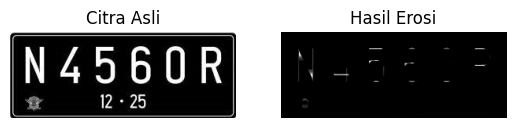

In [90]:
# Load citra asli menggunakan OpenCV
citra_asli = cv2.imread('/content/drive/MyDrive/PCVK/images/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk square 5x5
se = np.array([[1, 1, 1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1, 1, 1]
               ], dtype=np.uint8)



# Lakukan erosi dengan SE
def erosi(citra_asli, se):
    height, width = citra_asli.shape
    citra_erosi = np.zeros((height, width), dtype=np.uint8)

    se_height, se_width = se.shape
    se_center_x, se_center_y = se_width // 2, se_height // 2

    for x in range(se_center_x, width - se_center_x):
        for y in range(se_center_y, height - se_center_y):
            # Inisialisasi nilai minimum
            min_pixel = 255

            for i in range(-se_center_x, se_center_x + 1):
                for j in range(-se_center_y, se_center_y + 1):
                    if se[j + se_center_y][i + se_center_x] == 1:
                        pixel_value = citra_asli[y + j][x + i]
                        min_pixel = min(min_pixel, pixel_value)

            citra_erosi[y][x] = min_pixel

    return citra_erosi

# Lakukan erosi pada citra asli
citra_hasil_erosi = erosi(citra_asli, se)

# Tampilkan citra asli dan hasil erosi
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(citra_asli, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Hasil Erosi")
plt.imshow(citra_hasil_erosi, cmap='gray')
plt.axis('off')
plt.show()

##12. Operasi Erosi dengan Line Vertikal 3 dan 5

###Line Vertikal 3

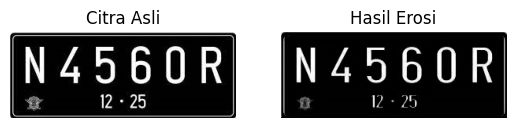

In [91]:
# Load citra asli menggunakan OpenCV
citra_asli = cv2.imread('/content/drive/MyDrive/PCVK/images/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk square 5x5
se = np.array([[1],
                 [1],
                 [1]
                 ], dtype=np.uint8)


# Lakukan erosi dengan SE
def erosi(citra_asli, se):
    height, width = citra_asli.shape
    citra_erosi = np.zeros((height, width), dtype=np.uint8)

    se_height, se_width = se.shape
    se_center_x, se_center_y = se_width // 2, se_height // 2

    for x in range(se_center_x, width - se_center_x):
        for y in range(se_center_y, height - se_center_y):
            # Inisialisasi nilai minimum
            min_pixel = 255

            for i in range(-se_center_x, se_center_x + 1):
                for j in range(-se_center_y, se_center_y + 1):
                    if se[j + se_center_y][i + se_center_x] == 1:
                        pixel_value = citra_asli[y + j][x + i]
                        min_pixel = min(min_pixel, pixel_value)

            citra_erosi[y][x] = min_pixel

    return citra_erosi

# Lakukan erosi pada citra asli
citra_hasil_erosi = erosi(citra_asli, se)

# Tampilkan citra asli dan hasil erosi
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(citra_asli, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Hasil Erosi")
plt.imshow(citra_hasil_erosi, cmap='gray')
plt.axis('off')
plt.show()

###Line Vertikal 5

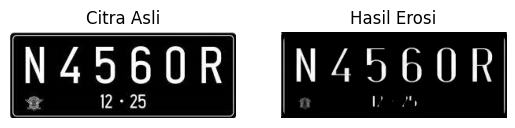

In [92]:
# Load citra asli menggunakan OpenCV
citra_asli = cv2.imread('/content/drive/MyDrive/PCVK/images/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element (SE) berbentuk line 5
se_5 = np.array([[1],
                 [1],
                 [1],
                 [1],
                 [1]
                 ], dtype=np.uint8)

# Lakukan erosi dengan SE
def erosi(citra_asli, se):
    height, width = citra_asli.shape
    citra_erosi = np.zeros((height, width), dtype=np.uint8)

    se_height, se_width = se_5.shape
    se_center_x, se_center_y = se_width // 2, se_height // 2

    for x in range(se_center_x, width - se_center_x):
        for y in range(se_center_y, height - se_center_y):
            # Inisialisasi nilai minimum
            min_pixel = 255

            for i in range(-se_center_x, se_center_x + 1):
                for j in range(-se_center_y, se_center_y + 1):
                    if se[j + se_center_y][i + se_center_x] == 1:
                        pixel_value = citra_asli[y + j][x + i]
                        min_pixel = min(min_pixel, pixel_value)

            citra_erosi[y][x] = min_pixel

    return citra_erosi

# Lakukan erosi pada citra asli
citra_hasil_erosi = erosi(citra_asli, se_5)

# Tampilkan citra asli dan hasil erosi
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(citra_asli, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Hasil Erosi")
plt.imshow(citra_hasil_erosi, cmap='gray')
plt.axis('off')
plt.show()

##13. Top Hat

(-0.5, 669.5, 626.5, -0.5)

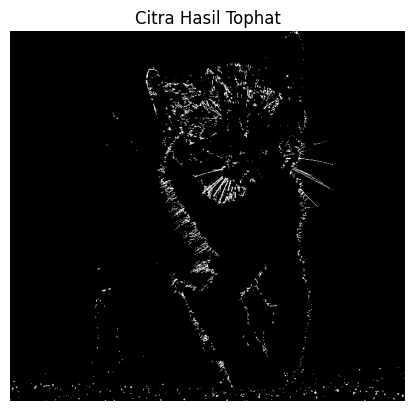

In [93]:
# Load citra asli menggunakan OpenCV
# read the image
img = cv2.imread("/content/drive/MyDrive/PCVK/images/kitten01.jpg", 0)

# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((3, 3), np.uint8)

# use morph gradient
morph_gradient = cv2.morphologyEx(binr, cv2.MORPH_TOPHAT, kernel)
# print the output
plt.title("Citra Hasil Tophat")
plt.imshow(morph_gradient, cmap='gray')
plt.axis("off")

##14. Black Hat

(-0.5, 669.5, 626.5, -0.5)

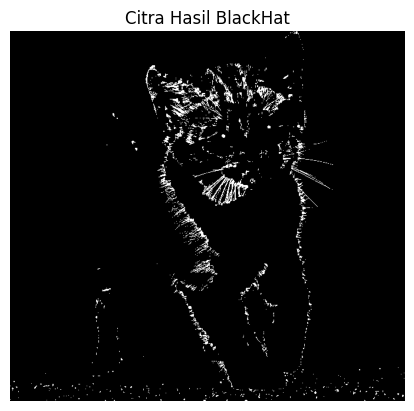

In [94]:
# Load citra asli menggunakan OpenCV
citra_asli = cv2.imread('/content/drive/MyDrive/PCVK/images/kitten01.jpg', cv2.IMREAD_GRAYSCALE)


# invert the image
invert = cv2.bitwise_not(binr)
kernel = np.ones((5, 5), np.uint8)
# use morph gradi5nt
morph_gradient = cv2.morphologyEx(invert,
                                  cv2.MORPH_BLACKHAT,
                                  kernel)
# print the output
plt.title("Citra Hasil BlackHat")
plt.imshow(morph_gradient, cmap='gray')
plt.axis("off")



##15. Skeleton

(-0.5, 622.5, 598.5, -0.5)

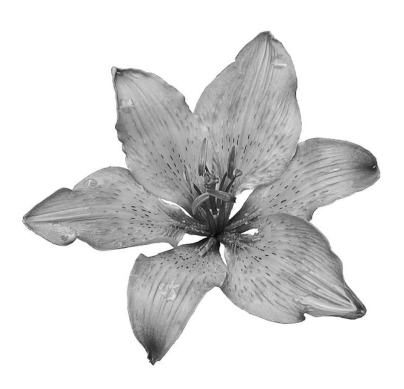

In [95]:
lily = cv2.imread("/content/drive/MyDrive/PCVK/images/lily.jpg", 0)
plt.imshow(lily, cmap='gray')
plt.axis("off")

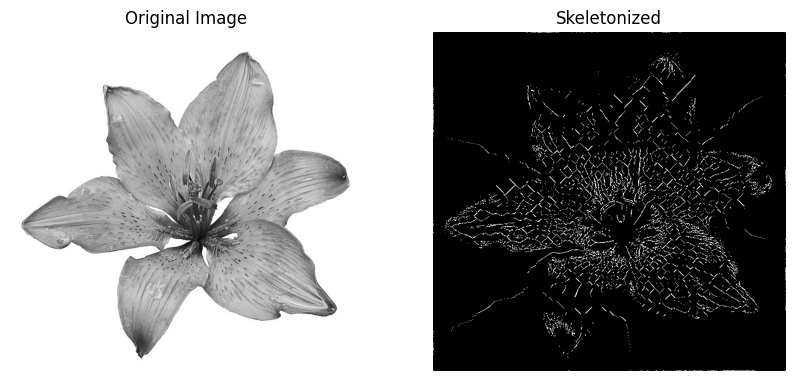

In [96]:
size = np.size(lily)
skel = np.zeros(lily.shape,np.uint8)

ret,img = cv2.threshold(lily,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False

while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True
# Display the original and skeletonized images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(lily, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(122)
plt.imshow(skel, cmap='gray')
plt.title("Skeletonized")
plt.axis("off")

plt.show()

##16. Skeleton Inverse

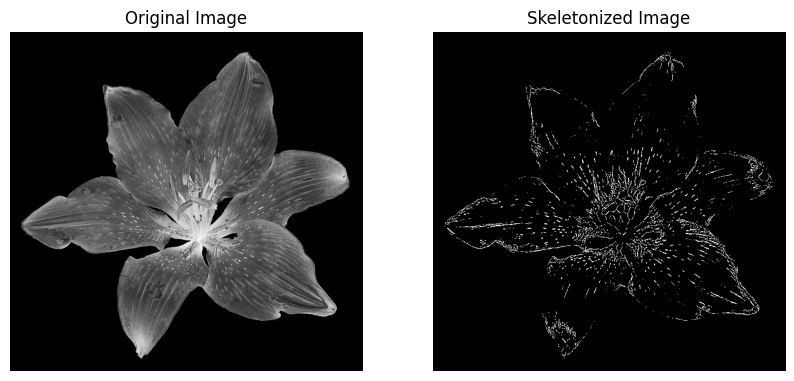

In [97]:
size = np.size(lily)
skel = np.zeros(lily.shape,np.uint8)
lily = 255 - lily
ret,img = cv2.threshold(lily,127,255,0)

element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False

while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True
# Display the original and skeletonized images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(lily, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(122)
plt.imshow(skel, cmap='gray')
plt.title("Skeletonized Image")
plt.axis("off")

plt.show()

##Tugas

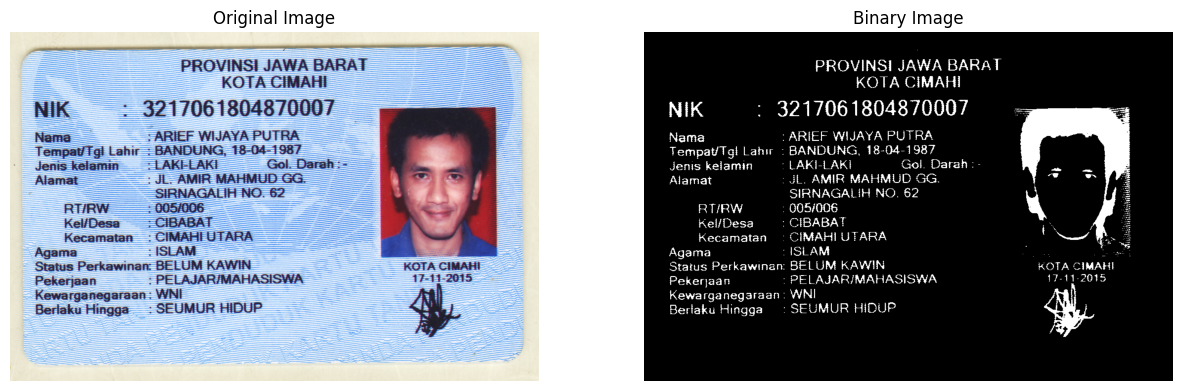

In [98]:
ktp = cv2.imread("/content/drive/MyDrive/PCVK/KTP_More/ktp2.png")
ktp_bw = cv2.cvtColor(ktp,cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(ktp_bw)
ret,binr = cv2.threshold(equ,20,255,0)
binr = 255 - binr
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(ktp,cv2.COLOR_BGR2RGB), cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(122)
plt.imshow(binr, cmap='gray')
plt.title("Binary Image")
plt.axis("off")

plt.show()

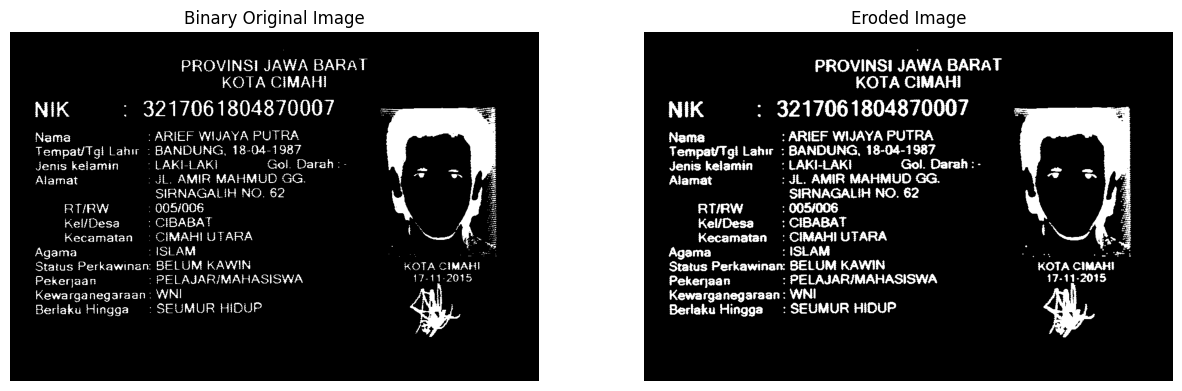

In [99]:
# define the kernel

line = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype=np.uint8)

img_erosion = cv2.dilate(binr, line, iterations=1)

# Display the original and skeletonized images
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(binr, cmap='gray')
plt.title("Binary Original Image")
plt.axis("off")

plt.subplot(122)
plt.imshow(img_erosion, cmap='gray')
plt.title("Eroded Image")
plt.axis("off")

plt.show()